# Learning and Decision Making

## Laboratory 4: Reinforcement learning

In the end of the lab, you should export the notebook to a Python script (File >> Download as >> Python (.py)). Your file should be named `padi-lab4-groupXX.py`, where the `XX` corresponds to your group number and should be submitted to the e-mail <adi.tecnico@gmail.com>. 

Make sure...

* **... that the subject is of the form `[<group n.>] LAB <lab n.>`.** 

* **... to strictly respect the specifications in each activity, in terms of the intended inputs, outputs and naming conventions.** 

In particular, after completing the activities you should be able to replicate the examples provided (although this, in itself, is no guarantee that the activities are correctly completed).

### 1. The MDP Model 

In this lab you will implement several reinforcement learning algorithms, and use the "Pacman" domain, from Lab 2, to test and compare these algorithms. Don't forget, however, that your functions should work for **any MDP** and not just the one provided. 

The "Pacman" domain to be used is represented in the diagram below.

<img src="pacman-big.png">

In the Pacman domain above,

* The ghost moves randomly between cells 1-3.
* The player controls the movement of Pacman through four actions: `Up`, `Down`, `Left`, and `Right`. 
* Each action moves the Pacman character one step in the corresponding direction, if an adjacent cell exists in that direction. Otherwise, Pacman remains in the same place.
* The cell in the bottom left corner (cell `29`) is adjacent, to the left, to the cell in the bottom right corner (cell `35`). In other words, if Pacman "moves left" in cell `29` it will end up in cell `35` and vice-versa.
* If Pacman lies in the same cell as the ghost (in either cell `1`, `2`, or `3`), the player loses the game. However, if Pacman "eats" the blue pellet (in cell `24`), it gains the ability to "eat" the ghost. In this case, if Pacman lies in the same cell as the ghost, it "eats" the ghost and wins the game. Assume that Pacman can never be in cell `24` without "eating" the pellet.

**Throughout the lab, unless if stated otherwise, use $\gamma=0.9$.**

$$\diamond$$

We start by loading the MDP for the "Pacman" domain from the file `pacman.npz`. We will use this domain as an example to illustrate the different functions/algorithms you are expected to deploy. The file contains both the MDP, described as a tuple like those from Lab 2, and the corresponding optimal $Q$-function.

To do so, you can run the code
```python
import numpy as np

mdp_info = np.load('pacman.npz', allow_pickle=True)

# The MDP is a tuple (X, A, P, c, gamma)
M = mdp_info['M']

# We also load the optimal Q-function for the MDP
Qopt = mdp_info['Q']
```

---

In the first activity, you will implement a "simulator of the world". The simulator consists of a function that enables you to sample a transition from a given MDP. You will then use this function, in subsequent activities, to generate the data that your agent will use to learn.

In [30]:
import numpy as np

mdp_info = np.load('pacman.npz', allow_pickle=True)

# The MDP is a tuple (X, A, P, c, gamma)
M = mdp_info['M']

# We also load the optimal Q-function for the MDP
Qopt = mdp_info['Q']

---

#### Activity 1.        

Write a function named `sample_transition` that receives, as input, a tuple representing an arbitrary MDP as well as two integers, `s` and `a`, corresponding to a state and an action. The function should return a tuple `(s, a, c, s')`, where `c` is the cost associated with performing action `a` in state `s` and `s'` is a state generated from `s` upon selecting action `a`, according to the transition probabilities for the MDP.

---

In [31]:
# Insert your code here.
def sample_transition(mdp, s, a):
    
    # cost associated with performing action a
    c = mdp[3][s,a]
    
    # trasition probability matrix associated with action a 
    Pa = mdp[2][a]
    
    # generate s', given the probability distribution at state x upon selecting action a
    next_state = rnd.choice(len(mdp[0]), p=Pa[s, :])
    
    return (s,a,c,next_state)

In [32]:
import numpy.random as rnd

rnd.seed(42)

# Select random state and action
s = 106 # State (18, 0, 2)
a = rnd.randint(len(M[1]))

s, a, cnew, snew = sample_transition(M, s, a)

print('Observed transition:\n(', end='')
print(M[0][s], end=', ')
print(M[1][a], end=', ')
print(cnew, end=', ')
print(M[0][snew], end=')\n')

# Select random state and action
s = 12 # State (3, S, 1)
a = rnd.randint(len(M[1]))

s, a, cnew, snew = sample_transition(M, s, a)

print('\nObserved transition:\n(', end='')
print(M[0][s], end=', ')
print(M[1][a], end=', ')
print(cnew, end=', ')
print(M[0][snew], end=')\n')

# Select random state and action
s = 164 # State (28, 0, 3)
a = rnd.randint(len(M[1]))

s, a, cnew, snew = sample_transition(M, s, a)

print('\nObserved transition:\n(', end='')
print(M[0][s], end=', ')
print(M[1][a], end=', ')
print(cnew, end=', ')
print(M[0][snew], end=')\n')

Observed transition:
((18, 0, 2), Left, 0.1, (17, 0, 3))

Observed transition:
((3, S, 1), Left, 0.1, (2, S, 2))

Observed transition:
((28, 0, 3), Up, 0.1, (24, S, 2))


All reinforcement learning algorithms that you will implement can only access the MDP through the function `sample_transition` which, in a sense, simulates an "interaction" of the agent with the environment.

For example, using the "Pacman" MDP, you could run:

```python
import numpy.random as rnd

rnd.seed(42)

# Select random state and action
s = 106 # State (18, 0, 2)
a = rnd.randint(len(M[1]))

s, a, cnew, snew = sample_transition(M, s, a)

print('Observed transition:\n(', end='')
print(M[0][s], end=', ')
print(M[1][a], end=', ')
print(cnew, end=', ')
print(M[0][snew], end=')\n')

# Select random state and action
s = 12 # State (3, S, 1)
a = rnd.randint(len(M[1]))

s, a, cnew, snew = sample_transition(M, s, a)

print('\nObserved transition:\n(', end='')
print(M[0][s], end=', ')
print(M[1][a], end=', ')
print(cnew, end=', ')
print(M[0][snew], end=')\n')

# Select random state and action
s = 164 # State (28, 0, 3)
a = rnd.randint(len(M[1]))

s, a, cnew, snew = sample_transition(M, s, a)

print('\nObserved transition:\n(', end='')
print(M[0][s], end=', ')
print(M[1][a], end=', ')
print(cnew, end=', ')
print(M[0][snew], end=')\n')
```

and get, as output:

```
Observed transition:
((18, 0, 2), Left, 0.1, (17, 0, 3))

Observed transition:
((3, S, 1), Left, 0.1, (2, S, 2))

Observed transition:
((28, 0, 3), Up, 0.1, (24, S, 2))
```

---

#### Activity 2.        

Write down a function named `egreedy` that implements an $\epsilon$-greedy policy. Your function should receive, as input, a `numpy` array `Q` with shape `(N,)`, for some integer `N`, and, as an optional argument, a floating point number `eps` with a default value `eps=0.1`. Your function should return... 

* ... with a probability $\epsilon$, a random index between $0$ and $N-1$.
* ... with a probability $1-\epsilon$, the index between $0$ and $N-1$ corresponding to the minimum value of `Q`. If more than one such index exists, the function should select among such indices **uniformly at random**.

**Note:** In the upcoming activities, the array `Q` received by the function `egreedy` will correspond to a row of a $Q$-function, and `N` will correspond to the number of actions.

In [33]:
# Insert your code here.
def egreedy(Q, eps = 0.1):
    
    N = Q.shape[0]
    
    # uniform distribution over the interval [0,1]
    p = rnd.uniform()
    
    if p < eps: # exploration 
        a = rnd.choice(N)
        
    else: # explotation 
        a_greedy = np.isclose(Q, np.min(Q)).astype(int)
        
        # uniform distribution over the actions that have associated the minimum value of Q. 
        # The other actions have a probability of 0 
        distr = a_greedy/a_greedy.sum()
        
        a = rnd.choice(N, p = distr.flatten())
    
    return a

In [34]:
rnd.seed(42)

s = 106 # State (18, 0, 2)
a = egreedy(Qopt[s, :], eps=0)
print('State:', M[0][s], '- action (eps=0.0):', M[1][a])
a = egreedy(Qopt[s, :], eps=0.5)
print('State:', M[0][s], '- action (eps=0.5):', M[1][a])
a = egreedy(Qopt[s, :], eps=1.0)
print('State:', M[0][s], '- action (eps=1.0):', M[1][a])

s = 12 # State (3, S, 1)
a = egreedy(Qopt[s, :], eps=0)
print('\nState:', M[0][s], '- action (eps=0.0):', M[1][a])
a = egreedy(Qopt[s, :], eps=0.5)
print('State:', M[0][s], '- action (eps=0.5):', M[1][a])
a = egreedy(Qopt[s, :], eps=1.0)
print('State:', M[0][s], '- action (eps=1.0):', M[1][a])

s = 164 # State (28, 0, 3)
a = egreedy(Qopt[s, :], eps=0)
print('\nState:', M[0][s], '- action (eps=0.0):', M[1][a])
a = egreedy(Qopt[s, :], eps=0.5)
print('State:', M[0][s], '- action (eps=0.5):', M[1][a])
a = egreedy(Qopt[s, :], eps=1.0)
print('State:', M[0][s], '- action (eps=1.0):', M[1][a])

State: (18, 0, 2) - action (eps=0.0): Right
State: (18, 0, 2) - action (eps=0.5): Right
State: (18, 0, 2) - action (eps=1.0): Left

State: (3, S, 1) - action (eps=0.0): Left
State: (3, S, 1) - action (eps=0.5): Right
State: (3, S, 1) - action (eps=1.0): Down

State: (28, 0, 3) - action (eps=0.0): Up
State: (28, 0, 3) - action (eps=0.5): Up
State: (28, 0, 3) - action (eps=1.0): Up


For example, using the function `Qopt` loaded from the "Pacman" file, you can run:

```python
rnd.seed(42)

s = 106 # State (18, 0, 2)
a = egreedy(Qopt[s, :], eps=0)
print('State:', M[0][s], '- action (eps=0.0):', M[1][a])
a = egreedy(Qopt[s, :], eps=0.5)
print('State:', M[0][s], '- action (eps=0.5):', M[1][a])
a = egreedy(Qopt[s, :], eps=1.0)
print('State:', M[0][s], '- action (eps=1.0):', M[1][a])

s = 12 # State (3, S, 1)
a = egreedy(Qopt[s, :], eps=0)
print('\nState:', M[0][s], '- action (eps=0.0):', M[1][a])
a = egreedy(Qopt[s, :], eps=0.5)
print('State:', M[0][s], '- action (eps=0.5):', M[1][a])
a = egreedy(Qopt[s, :], eps=1.0)
print('State:', M[0][s], '- action (eps=1.0):', M[1][a])

s = 164 # State (28, 0, 3)
a = egreedy(Qopt[s, :], eps=0)
print('\nState:', M[0][s], '- action (eps=0.0):', M[1][a])
a = egreedy(Qopt[s, :], eps=0.5)
print('State:', M[0][s], '- action (eps=0.5):', M[1][a])
a = egreedy(Qopt[s, :], eps=1.0)
print('State:', M[0][s], '- action (eps=1.0):', M[1][a])
```

you will get the output

```
State: (18, 0, 2) - action (eps=0.0): Right
State: (18, 0, 2) - action (eps=0.5): Right
State: (18, 0, 2) - action (eps=1.0): Left

State: (3, S, 1) - action (eps=0.0): Left
State: (3, S, 1) - action (eps=0.5): Right
State: (3, S, 1) - action (eps=1.0): Down

State: (28, 0, 3) - action (eps=0.0): Up
State: (28, 0, 3) - action (eps=0.5): Up
State: (28, 0, 3) - action (eps=1.0): Up
```

Note that, depending on the order and number of calls to functions in the random library you may get slightly different results.

---

#### Activity 3. 

Write a function `mb_learning` that implements the model-based reinforcement learning algorithm discussed in class. Your function should receive as input arguments 

* A tuple, `mdp`, containing the description of an **arbitrary** MDP. The structure of the tuple is similar to that provided in the example above. 
* An integer, `n`, corresponding the number of steps that your algorithm should run.
*  A numpy array `qinit` with as many rows as the number of states in `mdp` and as many columns as the number of actions in `mdp`. The matrix `qinit` should be used to initialize the $Q$-function being learned by your function.
* A tuple, `Pinit`, with as many elements as the number of actions in `mdp`. Each element of `Pinit` corresponds to square numpy arrays with as many rows/columns as the number of states in `mdp` and can be **any** transition probability matrix. The matrices in `Pinit` should be used to initialize the transition probability matrices of the model being learned by your function.
* A numpy array `cinit` with as many rows as the number of states in `mdp` and as many columns as the number of actions in `mdp`. The matrix `cinit` should be used to initialize the cost function of the model being learned by your function.

Your function should simulate an interaction of `n` steps between the agent and the environment, during which it should perform `n` iterations of the model-based RL algorithm seen in class. In particular, it should learn the transition probabilities and cost function from the interaction between the agent and the environment, and use these to compute the optimal $Q$-function. The transition probabilities, cost and $Q$-functions to be learned should be initialized using `Pinit`, `cinit` and `qinit`, respectively. 

Note that, at each step of the interaction,

* The agent should observe the current state, and select an action using an $\epsilon$-greedy policy with respect to its current estimate of the optimal $Q$-values. You should use the function `egreedy` from Activity 2, with $\epsilon=0.15$. 
* Given the state and action, you must then compute the cost and generate the next state, using `mdp` and the function `sample_transition` from Activity 1.
* With this transition information (state, action, cost, next-state), you can now perform an update to the transition probabilities, cost function, and $Q$-function.
* When updating the components $(x,a)$ of the model, use the step-size

$$\alpha_t=\frac{1}{N_t(x,a)+1},$$

where $N_t(x,a)$ is the number of visits to the pair $(x,a)$ up to time step $t$.

Your function should return a tuple containing:

*  A numpy array with as many rows as the number of states in `mdp` and as many columns as the number of actions in `mdp`, corresponding to the learned $Q$-function.
* A tuple with as many elements as the number of actions in `mdp`. The element $a$ of the tuple corresponds to a square numpy array with as many rows/columns as the number of states in `mdp`, corresponding to the learned transition probabilities for action $a$.
* A numpy array with as many rows as the number of states in `mdp` and as many columns as the number of actions in `mdp`, corresponding to the learned cost function.

---

In [35]:
# Insert your code here.
def mb_learning(mdp, n, qinit, Pinit, cinit):
    
    # initialization of the number of visits to the pair (𝑥,𝑎) up to time step 𝑡
    N = np.ones((len(mdp[0]), len(mdp[1])))
    
    gamma = mdp[-1]
    
    numstates = len(mdp[0])
    numactions = len(mdp[1])
    
    # select at random the initial state (time step t = 0)
    s = rnd.choice(numstates)
    
    # simulates an interaction of n steps between the agent and the environment
    for t in range(n):
        
        # given the current state, select an action using an 𝜖-greedy policy with respect to 
        # its current estimate of the optimal 𝑄-values
        a = egreedy(qinit[s,:], 0.15) 
        
        # update the number of visits to the pair (𝑥,𝑎) up to time step 𝑡
        N[s,a] += 1
        
        # step-size
        alfa = 1/(N[s,a])
        
        
        # compute the cost and generate the next state
        transition = sample_transition(mdp, s, a)
        
        # cost in time step t
        c = transition[2]
        
        # state in time step t + 1
        s_next = transition[3]
        
        
        # perform an update to the transition probabilities, cost function, and 𝑄-function.
        cinit[s,a] += alfa*(c - cinit[s,a])
        
        I = np.zeros((numstates,1))
        I[s_next,0]=1
        
        Pinit[a][s,:] += alfa*(I.flatten()-Pinit[a][s,:])
        
        qinit[s,a] = cinit[s,a] + gamma*((Pinit[a][s, :]).dot(np.min(qinit, axis = 1)))
        
        # update the current state for the next iteration 
        s = s_next 
        
    return (qinit, Pinit, cinit)

In [36]:
rnd.seed(42)

# Initialize transition probabilities
pinit = ()

for a in range(len(M[1])):
    pinit += (np.eye(len(M[0])),)

# Initialize cost function
cinit = np.zeros((len(M[0]), len(M[1])))

# Initialize Q-function
qinit = np.zeros((len(M[0]), len(M[1])))

# Run 1000 steps of model-based learning
qnew, pnew, cnew = mb_learning(M, 1000, qinit, pinit, cinit)

# Compare the learned Q with the optimal Q
print('Error in Q after 1000 steps:', np.linalg.norm(qnew - Qopt))

# Run 1000 additional steps of model-based learning
qnew, pnew, cnew = mb_learning(M, 1000, qnew, pnew, cnew)

# Compare once again the learned Q with the optimal Q
print('Error in Q after 2000 steps:', np.linalg.norm(qnew - Qopt))

Error in Q after 1000 steps: 19.916238521031588
Error in Q after 2000 steps: 19.864356679803585


As an example using the "Pacman" MDP, we could run:

```python
rnd.seed(42)

# Initialize transition probabilities
pinit = ()

for a in range(len(M[1])):
    pinit += (np.eye(len(M[0])),)

# Initialize cost function
cinit = np.zeros((len(M[0]), len(M[1])))

# Initialize Q-function
qinit = np.zeros((len(M[0]), len(M[1])))

# Run 1000 steps of model-based learning
qnew, pnew, cnew = mb_learning(M, 1000, qinit, pinit, cinit)

# Compare the learned Q with the optimal Q
print('Error in Q after 1000 steps:', np.linalg.norm(qnew - Qopt))

# Run 1000 additional steps of model-based learning
qnew, pnew, cnew = mb_learning(M, 1000, qnew, pnew, cnew)

# Compare once again the learned Q with the optimal Q
print('Error in Q after 2000 steps:', np.linalg.norm(qnew - Qopt))
```

to get

```
Error in Q after 1000 steps: 19.916238521031588
Error in Q after 2000 steps: 19.86435667980359
```

Note that, even if the seed is fixed, the numerical values may differ somewhat from those above.

### 3. Model-free learning

You will now implement both $Q$-learning and SARSA.

---

#### Activity 4. 

Write a function `qlearning` that implements the $Q$-learning algorithm discussed in class. Your function should receive as input arguments 

* A tuple, `mdp`, containing the description of an **arbitrary** MDP. The structure of the tuple is similar to that provided in the examples above. 
* An integer, `n`, corresponding he number of steps that your algorithm should run.
*  A `numpy` array `qinit` with as many rows as the number of states in `mdp` and as many columns as the number of actions in `mdp`. The matrix `qinit` should be used to initialize the $Q$-function being learned by your function.

Your function should simulate an interaction of `n` steps between the agent and the environment, during which it should perform `n` iterations of the $Q$-learning algorithm seen in class. In particular, it should learn optimal $Q$-function. The $Q$-function to be learned should be initialized using `qinit`. 

Note that, at each step of the interaction,

* The agent should observe the current state, and select an action using an $\epsilon$-greedy policy with respect to its current estimate of the optimal $Q$-values. You should use the function `egreedy` from Activity 2, with $\epsilon=0.15$. 
* Given the state and action, you must then compute the cost and generate the next state, using `mdp` and the function `sample_transition` from Activity 1.
* With this transition information (state, action, cost, next-state), you can now perform an update to the $Q$-function.
* When updating the components $(x,a)$ of the model, use the step-size $\alpha=0.3$.

Your function should return a `numpy` array with as many rows as the number of states in `mdp` and as many columns as the number of actions in `mdp`, corresponding to the learned $Q$-function.

---

In [37]:
# Insert your code here.
def qlearning(mdp, n, qinit):
        
    gamma = mdp[-1]
    alfa = 0.3
    
    numstates = len(mdp[0])
    numactions = len(mdp[1])
    
    # select at random the initial state (time step t = 0)
    s = rnd.choice(numstates)
    
    # simulates an interaction of n steps between the agent and the environment
    for t in range(n):
        
        # given the current state, select an action using an 𝜖-greedy policy with respect to 
        # its current estimate of the optimal 𝑄-values
        a = egreedy(qinit[s,:], 0.15) 
        
 
        # compute the cost and generate the next state
        transition = sample_transition(mdp, s, a)
        
        # cost in time step t
        c = transition[2]
        
        # state in time step t + 1
        s_next = transition[3]
        
        
        # perform an update to the 𝑄-function    
        qinit[s,a] += alfa*(c + gamma*np.min(qinit[s_next,:])-qinit[s,a])
        
        # update the current state for the next iteration
        s = s_next 
        
    return qinit

In [38]:
rnd.seed(42)

# Initialize Q-function
qinit = np.zeros((len(M[0]), len(M[1])))

# Run 1000 steps of model-based learning
qnew = qlearning(M, 1000, qinit)

# Compare the learned Q with the optimal Q
print('Error in Q after 1000 steps:', np.linalg.norm(qnew - Qopt))

# Run 1000 additional steps of model-based learning
qnew = qlearning(M, 1000, qnew)

# Compare once again the learned Q with the optimal Q
print('Error in Q after 2000 steps:', np.linalg.norm(qnew - Qopt))

Error in Q after 1000 steps: 19.944334092242844
Error in Q after 2000 steps: 19.91105731381223


As an example using the "Pacman" MDP, we could run:

```python
rnd.seed(42)

# Initialize Q-function
qinit = np.zeros((len(M[0]), len(M[1])))

# Run 1000 steps of model-based learning
qnew = qlearning(M, 1000, qinit)

# Compare the learned Q with the optimal Q
print('Error in Q after 1000 steps:', np.linalg.norm(qnew - Qopt))

# Run 1000 additional steps of model-based learning
qnew = qlearning(M, 1000, qnew)

# Compare once again the learned Q with the optimal Q
print('Error in Q after 2000 steps:', np.linalg.norm(qnew - Qopt))
```

to get

```
Error in Q after 1000 steps: 19.944334092242844
Error in Q after 2000 steps: 19.91105731381223
```

Once again, even if the seed is fixed, the numerical values may differ somewhat from those above.

---

#### Activity 5. 

Write a function `sarsa` that implements the SARSA algorithm discussed in class. Your function should receive as input arguments 

* A tuple, `mdp`, containing the description of an **arbitrary** MDP. The structure of the tuple is similar to that provided in the examples above. 
* An integer, `n`, corresponding he number of steps that your algorithm should run.
*  A `numpy` array `qinit` with as many rows as the number of states in `mdp` and as many columns as the number of actions in `mdp`. The matrix `qinit` should be used to initialize the $Q$-function being learned by your function.

Your function should simulate an interaction of `n` steps between the agent and the environment, during which it should perform `n` iterations of the SARSA algorithm seen in class. The $Q$-function to be learned should be initialized using `qinit`. 

Note that, at each step of the interaction,

* The agent should observe the current state, and select an action using an $\epsilon$-greedy policy with respect to its current estimate of the optimal $Q$-values. You should use the function `egreedy` from Activity 2, with $\epsilon=0.15$. **Do not adjust the value of $\epsilon$ during learning.**
* Given the state and action, you must then compute the cost and generate the next state, using `mdp` and the function `sample_transition` from Activity 1.
* With this transition information (state, action, cost, next-state), you can now perform an update to the $Q$-function.
* When updating the components $(x,a)$ of the model, use the step-size $\alpha=0.3$.

Your function should return a `numpy` array with as many rows as the number of states in `mdp` and as many columns as the number of actions in `mdp`, corresponding to the learned $Q$-function.

---

In [39]:
# Insert your code here.
def sarsa(mdp, n, qinit):

    gamma = mdp[-1]
    alfa = 0.3
    
    numstates = len(mdp[0])
    numactions = len(mdp[1])
    
    # select at random the initial state (time step t = 0)
    s = rnd.choice(numstates)

    # given the current state, select an action using an 𝜖-greedy policy with respect to 
    # its current estimate of the optimal 𝑄-values
    a = egreedy(qinit[s,:], 0.15) 
    
    for t in range(n):
        
        # compute the cost and generate the next state
        transition = sample_transition(mdp, s, a)
        
        # cost in time step t
        c = transition[2]
        
        # state in time step t + 1
        s_next = transition[3]
        
        # given the current state, select an action using an 𝜖-greedy policy with respect to 
        # its current estimate of the optimal 𝑄-values
        a_next = egreedy(qinit[s_next,:], 0.15)
        
        # perform an update to the 𝑄-function    
        qinit[s,a] += alfa*(c + gamma*qinit[s_next,a_next]-qinit[s,a])
        
        # update the current state for the next iteration
        s = s_next 
        
        # update the current action for the next iteration
        a = a_next 
        
    return qinit

In [40]:
rnd.seed(42)

# Initialize Q-function
qinit = np.zeros((len(M[0]), len(M[1])))

# Run 1000 steps of model-based learning
qnew = sarsa(M, 1000, qinit)

# Compare the learned Q with the optimal Q
print('Error in Q after 1000 steps:', np.linalg.norm(qnew - Qopt))

# Run 1000 additional steps of model-based learning
qnew = sarsa(M, 1000, qnew)

# Compare once again the learned Q with the optimal Q
print('Error in Q after 2000 steps:', np.linalg.norm(qnew - Qopt))

Error in Q after 1000 steps: 19.944134856701385
Error in Q after 2000 steps: 19.91302892958602


100%|██████████| 10/10 [00:37<00:00,  3.75s/it]


Text(0, 0.5, 'Error in $Q$-function')

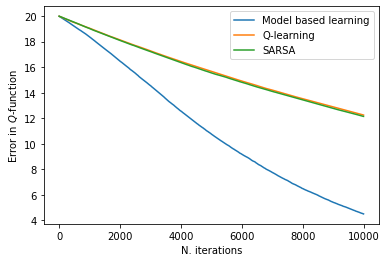

In [41]:
%matplotlib inline

import matplotlib.pyplot as plt
from tqdm import trange

STEPS = 10
ITERS = 1000
RUNS  = 10

iters = range(0, STEPS * ITERS + 1, STEPS)

# Error matrices
Emb = np.zeros(ITERS + 1)
Eql = np.zeros(ITERS + 1)
Ess = np.zeros(ITERS + 1)

Emb[0] = np.linalg.norm(Qopt) * RUNS
Eql[0] = Emb[0]
Ess[0] = Emb[0]

rnd.seed(42)

for n in trange(RUNS):

    # Initialization
    pmb = ()
    for a in range(len(M[1])):
        pmb += (np.eye(len(M[0])),)
    cmb = np.zeros((len(M[0]), len(M[1])))
    qmb = np.zeros((len(M[0]), len(M[1])))

    qql = np.zeros((len(M[0]), len(M[1])))

    qss = np.zeros((len(M[0]), len(M[1])))

    # Run evaluation
    for t in range(ITERS):
        qmb, pmb, cmb = mb_learning(M, STEPS, qmb, pmb, cmb)
        Emb[t + 1] += np.linalg.norm(Qopt - qmb)

        qql = qlearning(M, STEPS, qql)
        Eql[t + 1] += np.linalg.norm(Qopt - qql)

        qss = sarsa(M, STEPS, qss)
        Ess[t + 1] += np.linalg.norm(Qopt - qss)

Emb /= RUNS
Eql /= RUNS
Ess /= RUNS

plt.figure()
plt.plot(iters, Emb, label='Model based learning')
plt.plot(iters, Eql, label='Q-learning')
plt.plot(iters, Ess, label='SARSA')
plt.legend()
plt.xlabel('N. iterations')
plt.ylabel('Error in $Q$-function')

100%|██████████| 10/10 [06:53<00:00, 41.38s/it]


Text(0, 0.5, 'Error in $Q$-function')

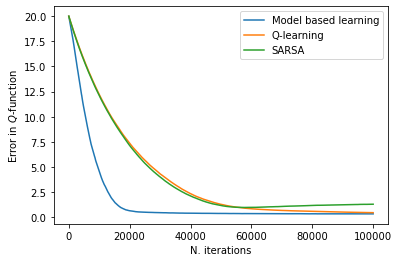

In [42]:
%matplotlib inline

import matplotlib.pyplot as plt
from tqdm import trange

STEPS = 10
ITERS = 10000
RUNS  = 10

iters = range(0, STEPS * ITERS + 1, STEPS)

# Error matrices
Emb = np.zeros(ITERS + 1)
Eql = np.zeros(ITERS + 1)
Ess = np.zeros(ITERS + 1)

Emb[0] = np.linalg.norm(Qopt) * RUNS
Eql[0] = Emb[0]
Ess[0] = Emb[0]

rnd.seed(42)

for n in trange(RUNS):

    # Initialization
    pmb = ()
    for a in range(len(M[1])):
        pmb += (np.eye(len(M[0])),)
    cmb = np.zeros((len(M[0]), len(M[1])))
    qmb = np.zeros((len(M[0]), len(M[1])))

    qql = np.zeros((len(M[0]), len(M[1])))

    qss = np.zeros((len(M[0]), len(M[1])))

    # Run evaluation
    for t in range(ITERS):
        qmb, pmb, cmb = mb_learning(M, STEPS, qmb, pmb, cmb)
        Emb[t + 1] += np.linalg.norm(Qopt - qmb)

        qql = qlearning(M, STEPS, qql)
        Eql[t + 1] += np.linalg.norm(Qopt - qql)

        qss = sarsa(M, STEPS, qss)
        Ess[t + 1] += np.linalg.norm(Qopt - qss)

Emb /= RUNS
Eql /= RUNS
Ess /= RUNS

plt.figure()
plt.plot(iters, Emb, label='Model based learning')
plt.plot(iters, Eql, label='Q-learning')
plt.plot(iters, Ess, label='SARSA')
plt.legend()
plt.xlabel('N. iterations')
plt.ylabel('Error in $Q$-function')

As an example using the "Pacman" MDP, we could run:

```python
rnd.seed(42)

# Initialize Q-function
qinit = np.zeros((len(M[0]), len(M[1])))

# Run 1000 steps of model-based learning
qnew = sarsa(M, 1000, qinit)

# Compare the learned Q with the optimal Q
print('Error in Q after 1000 steps:', np.linalg.norm(qnew - Qopt))

# Run 1000 additional steps of model-based learning
qnew = sarsa(M, 1000, qnew)

# Compare once again the learned Q with the optimal Q
print('Error in Q after 2000 steps:', np.linalg.norm(qnew - Qopt))
```

to get

```
Error in Q after 1000 steps: 19.944134856701385
Error in Q after 2000 steps: 19.91302892958602
```

You can also run the following code, to compare the performance of the three methods.

```python
%matplotlib inline

import matplotlib.pyplot as plt
from tqdm import trange

STEPS = 10
ITERS = 1000
RUNS  = 10

iters = range(0, STEPS * ITERS + 1, STEPS)

# Error matrices
Emb = np.zeros(ITERS + 1)
Eql = np.zeros(ITERS + 1)
Ess = np.zeros(ITERS + 1)

Emb[0] = np.linalg.norm(Qopt) * RUNS
Eql[0] = Emb[0]
Ess[0] = Emb[0]

rnd.seed(42)

for n in trange(RUNS):

    # Initialization
    pmb = ()
    for a in range(len(M[1])):
        pmb += (np.eye(len(M[0])),)
    cmb = np.zeros((len(M[0]), len(M[1])))
    qmb = np.zeros((len(M[0]), len(M[1])))

    qql = np.zeros((len(M[0]), len(M[1])))

    qss = np.zeros((len(M[0]), len(M[1])))

    # Run evaluation
    for t in range(ITERS):
        qmb, pmb, cmb = mb_learning(M, STEPS, qmb, pmb, cmb)
        Emb[t + 1] += np.linalg.norm(Qopt - qmb)

        qql = qlearning(M, STEPS, qql)
        Eql[t + 1] += np.linalg.norm(Qopt - qql)

        qss = sarsa(M, STEPS, qss)
        Ess[t + 1] += np.linalg.norm(Qopt - qss)
        
Emb /= RUNS
Eql /= RUNS
Ess /= RUNS

plt.figure()
plt.plot(iters, Emb, label='Model based learning')
plt.plot(iters, Eql, label='Q-learning')
plt.plot(iters, Ess, label='SARSA')
plt.legend()
plt.xlabel('N. iterations')
plt.ylabel('Error in $Q$-function')
```

As the output, you should observe a plot similar to the one below.

<img src="plot.png" align="left">

---

#### Activity 6.

**Based on the results you obtained when running the above code with your algorithms**, discuss the differences observed between the performance of the three methods.

---

<span style="color:blue">Insert your comments here.</span>

As can be seen, the performance of the model based method corresponds to the best of the three, taking into consideration the criteria of the error in the Q function (in relation to the optimal Q function) learned along iterations. The graphic shows that it is the one which more rapidly converges to the correct MDP (and hence the optimal Q function), being expected to do so if enough samples of each state are analysed, that is, if every action is experimented many times in every state. Indeed, these model based methods try to learn a model for the MDP (estimate the cost function and transition probabilities) from the experience that the agent has while interacting with the environment. In this case, the optimal Q function is learned by applying the value iteration algorithm for MDPs. This inner understanding of the system dynamics reduces the number of the samples required for learning (most sample efficient), thus its faster converge to the optimal Q-function regarding the number of iterations taken. 

In contrast, the Q-learning and SARSA algorithms allow to select actions without a model of the MDP. Although, the lesser the information about the model, the more trial and error is needed to compute the optimal Q-function, that is, more samples need to be acquired, thus more iterations are needed for converge to the optimal Q-function. 

Comparing Q-learning and SARSA, for ITERS = 1000 their performance is pratically the same. Altought, when setting ITERS = 10000, it is clearly seen that the SARSA diverges from the optimal Q-function, and the Q-learning converges to the optimal Q-function. This is due to the fact that the SARSA algorithm implemented doesn't  perform policy improvement (for example, 𝜀-greedy with decaying 𝜀), in order to make sure that the policy that the agent is following slowly approaches a greedy policy. In fact, off-policy methods (being Q-learning an example) learn the value of one policy (optimal policy) while following another, being guaranteed the converge to the optimal Q-function if enought exploration is undertaken (tunable by the 𝜀 parameter). As for on-policy methods (being SARSA an example), they learn the value of the policy that it follows, computing the Q-values for its current policy, being not guaranteed that it will converge to the optimal Q. 

Nevertheless, as more knowledge is available, suboptimal actions become less interesting, approaching the optimal Q-function, which was observed in the performances of the three algorithms. 